<a href="https://colab.research.google.com/github/palpitation0/ML-lecture-code/blob/master/City_MDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
url = 'https://raw.github.com/neurospin/pystatsml/master/datasets/eurodist.csv'
df = pd.read_csv(url)

In [3]:
print(df.iloc[:5, :5])

        city  Athens  Barcelona  Brussels  Calais
0     Athens       0       3313      2963    3175
1  Barcelona    3313          0      1318    1326
2   Brussels    2963       1318         0     204
3     Calais    3175       1326       204       0
4  Cherbourg    3339       1294       583     460


In [0]:
city = df["city"]
D= np.array(df.iloc[:, 1:]) # Distance matrix

In [0]:
from sklearn.manifold import MDS

In [0]:
mds = MDS(dissimilarity='precomputed', n_components=2, random_state=40,
         max_iter=3000, eps=1e-9)
X = mds.fit_transform(D)

In [0]:
from sklearn import metrics

In [8]:
Deuclidean = metrics.pairwise.pairwise_distances(X, metric='euclidean')
print(np.round(Deuclidean[:5,:5]))

[[   0. 3116. 2994. 3181. 3428.]
 [3116.    0. 1317. 1289. 1128.]
 [2994. 1317.    0.  198.  538.]
 [3181. 1289.  198.    0.  358.]
 [3428. 1128.  538.  358.    0.]]


In [0]:
theta = 80*np.pi/180
rot = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
Xr = np.dot(X,rot)

In [0]:
Xr[:,0] *= -1

(-1894.101774437739, 2914.3652937179486, -1712.98854632019, 2145.452245388456)

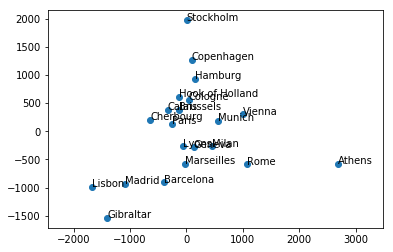

In [19]:
plt.scatter(Xr[:,0], Xr[:,1])
for i in range(len(city)):
  plt.text(Xr[i,0], Xr[i,1], city[i])
plt.axis('equal')

In [0]:
k_range = range(1, min(5, D.shape[0]-1))
stress = [MDS(dissimilarity='precomputed', n_components=k, random_state=42,
              max_iter=300, eps=1e-9).fit(D).stress_
         for k in k_range]

In [36]:
print(stress)

[48644495.28571428, 3356497.365752386, 2858455.4958879626, 2756310.637628011]


Text(0, 0.5, 'stress')

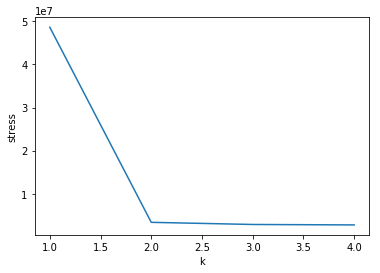

In [37]:
plt.plot(k_range, stress)
plt.xlabel("k")
plt.ylabel("stress")